# Libraries

In [1]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'/opt/homebrew/Cellar/tesseract/5.0.1/bin/tesseract'
import numpy as np
import time
import cv2
from IPython.display import Image
from PIL import Image as im
import face_recognition

# Image detection

## images filepaths

In [2]:
filepaths = ["data/team.png", "data/street.jpg", "data/scream.jpg", "data/group.jpeg", "data/word.png", "data/Cat.jpg", "data/person.jpg", "data/cover.jpeg"]

## detect text in image function

In [3]:
def hasText(filepath):
    text = pytesseract.image_to_string(filepath).strip()
    if text != "":
        return True
    else:
        return False

## detect person in image function

In [4]:
def hasPerson(filepath):
    INPUT_FILE=filepath
    LABELS_FILE='model/coco.names'
    CONFIG_FILE='model/yolov3.cfg'
    WEIGHTS_FILE='model/yolov3.weights'
    CONFIDENCE_THRESHOLD=0.3

    LABELS = open(LABELS_FILE).read().strip().split("\n")

    np.random.seed(4)
    COLORS = np.random.randint(0, 255, size=(len(LABELS), 3),
        dtype="uint8")


    net = cv2.dnn.readNetFromDarknet(CONFIG_FILE, WEIGHTS_FILE)

    image = cv2.imread(INPUT_FILE)
    (H, W) = image.shape[:2]

    # determine only the *output* layer names that we need from YOLO
    ln = net.getLayerNames()
    ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()] # if error, try i[0]-1


    blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416),
        swapRB=True, crop=False)
    net.setInput(blob)
    start = time.time()
    layerOutputs = net.forward(ln)
    end = time.time()


    print("[INFO] YOLO took {:.6f} seconds".format(end - start))


    # initialize our lists of detected bounding boxes, confidences, and
    # class IDs, respectively
    boxes = []
    confidences = []
    classIDs = []

    # loop over each of the layer outputs
    for output in layerOutputs:
        # loop over each of the detections
        for detection in output:
            # extract the class ID and confidence (i.e., probability) of
            # the current object detection
            scores = detection[5:]
            classID = np.argmax(scores)
            confidence = scores[classID]

            # filter out weak predictions by ensuring the detected
            # probability is greater than the minimum probability
            if confidence > CONFIDENCE_THRESHOLD:
                # scale the bounding box coordinates back relative to the
                # size of the image, keeping in mind that YOLO actually
                # returns the center (x, y)-coordinates of the bounding
                # box followed by the boxes' width and height
                box = detection[0:4] * np.array([W, H, W, H])
                (centerX, centerY, width, height) = box.astype("int")

                # use the center (x, y)-coordinates to derive the top and
                # and left corner of the bounding box
                x = int(centerX - (width / 2))
                y = int(centerY - (height / 2))

                # update our list of bounding box coordinates, confidences,
                # and class IDs
                boxes.append([x, y, int(width), int(height)])
                confidences.append(float(confidence))
                classIDs.append(classID)
                

    # apply non-maxima suppression to suppress weak, overlapping bounding
    # boxes
    idxs = cv2.dnn.NMSBoxes(boxes, confidences, CONFIDENCE_THRESHOLD, CONFIDENCE_THRESHOLD)
    
    if len(idxs) > 0:
        # loop over the indexes we are keeping
        for i in idxs.flatten():
            
            if LABELS[classIDs[i]] == "person":
                return True
            
    return False

## run functions

In [5]:
text_found = {}
for i in filepaths:
    
    # display(Image(filename=i))
    # print("found Text: \n"+pytesseract.image_to_string(i))
    answer = hasText(i)
    text_found[i] = answer
    print(i, " --> text found: ", answer)

data/team.png  --> text found:  False
data/street.jpg  --> text found:  True
data/scream.jpg  --> text found:  False
data/group.jpeg  --> text found:  False
data/word.png  --> text found:  True
data/Cat.jpg  --> text found:  False
data/person.jpg  --> text found:  False
data/cover.jpeg  --> text found:  True


In [6]:
person_found = {}
for i in filepaths:
    
    # display(Image(filename=i))

    answer = hasPerson(i)
    person_found[i] = answer
    print(i, " --> person found: ", answer)

[INFO] YOLO took 0.554759 seconds
data/team.png  --> person found:  True
[INFO] YOLO took 0.502489 seconds
data/street.jpg  --> person found:  True
[INFO] YOLO took 0.496499 seconds
data/scream.jpg  --> person found:  False
[INFO] YOLO took 0.491627 seconds
data/group.jpeg  --> person found:  True
[INFO] YOLO took 0.491901 seconds
data/word.png  --> person found:  False
[INFO] YOLO took 0.494952 seconds
data/Cat.jpg  --> person found:  False
[INFO] YOLO took 0.494087 seconds
data/person.jpg  --> person found:  True
[INFO] YOLO took 0.491894 seconds
data/cover.jpeg  --> person found:  True


data/team.png  text:  False  person:  True


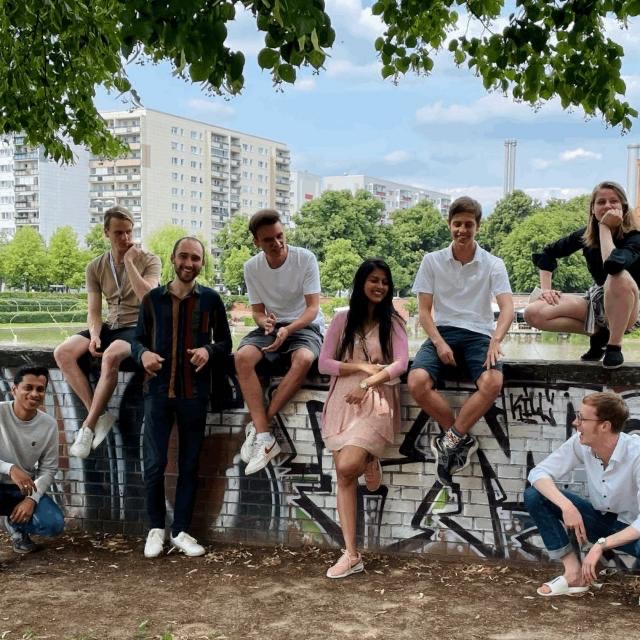

data/street.jpg  text:  True  person:  True


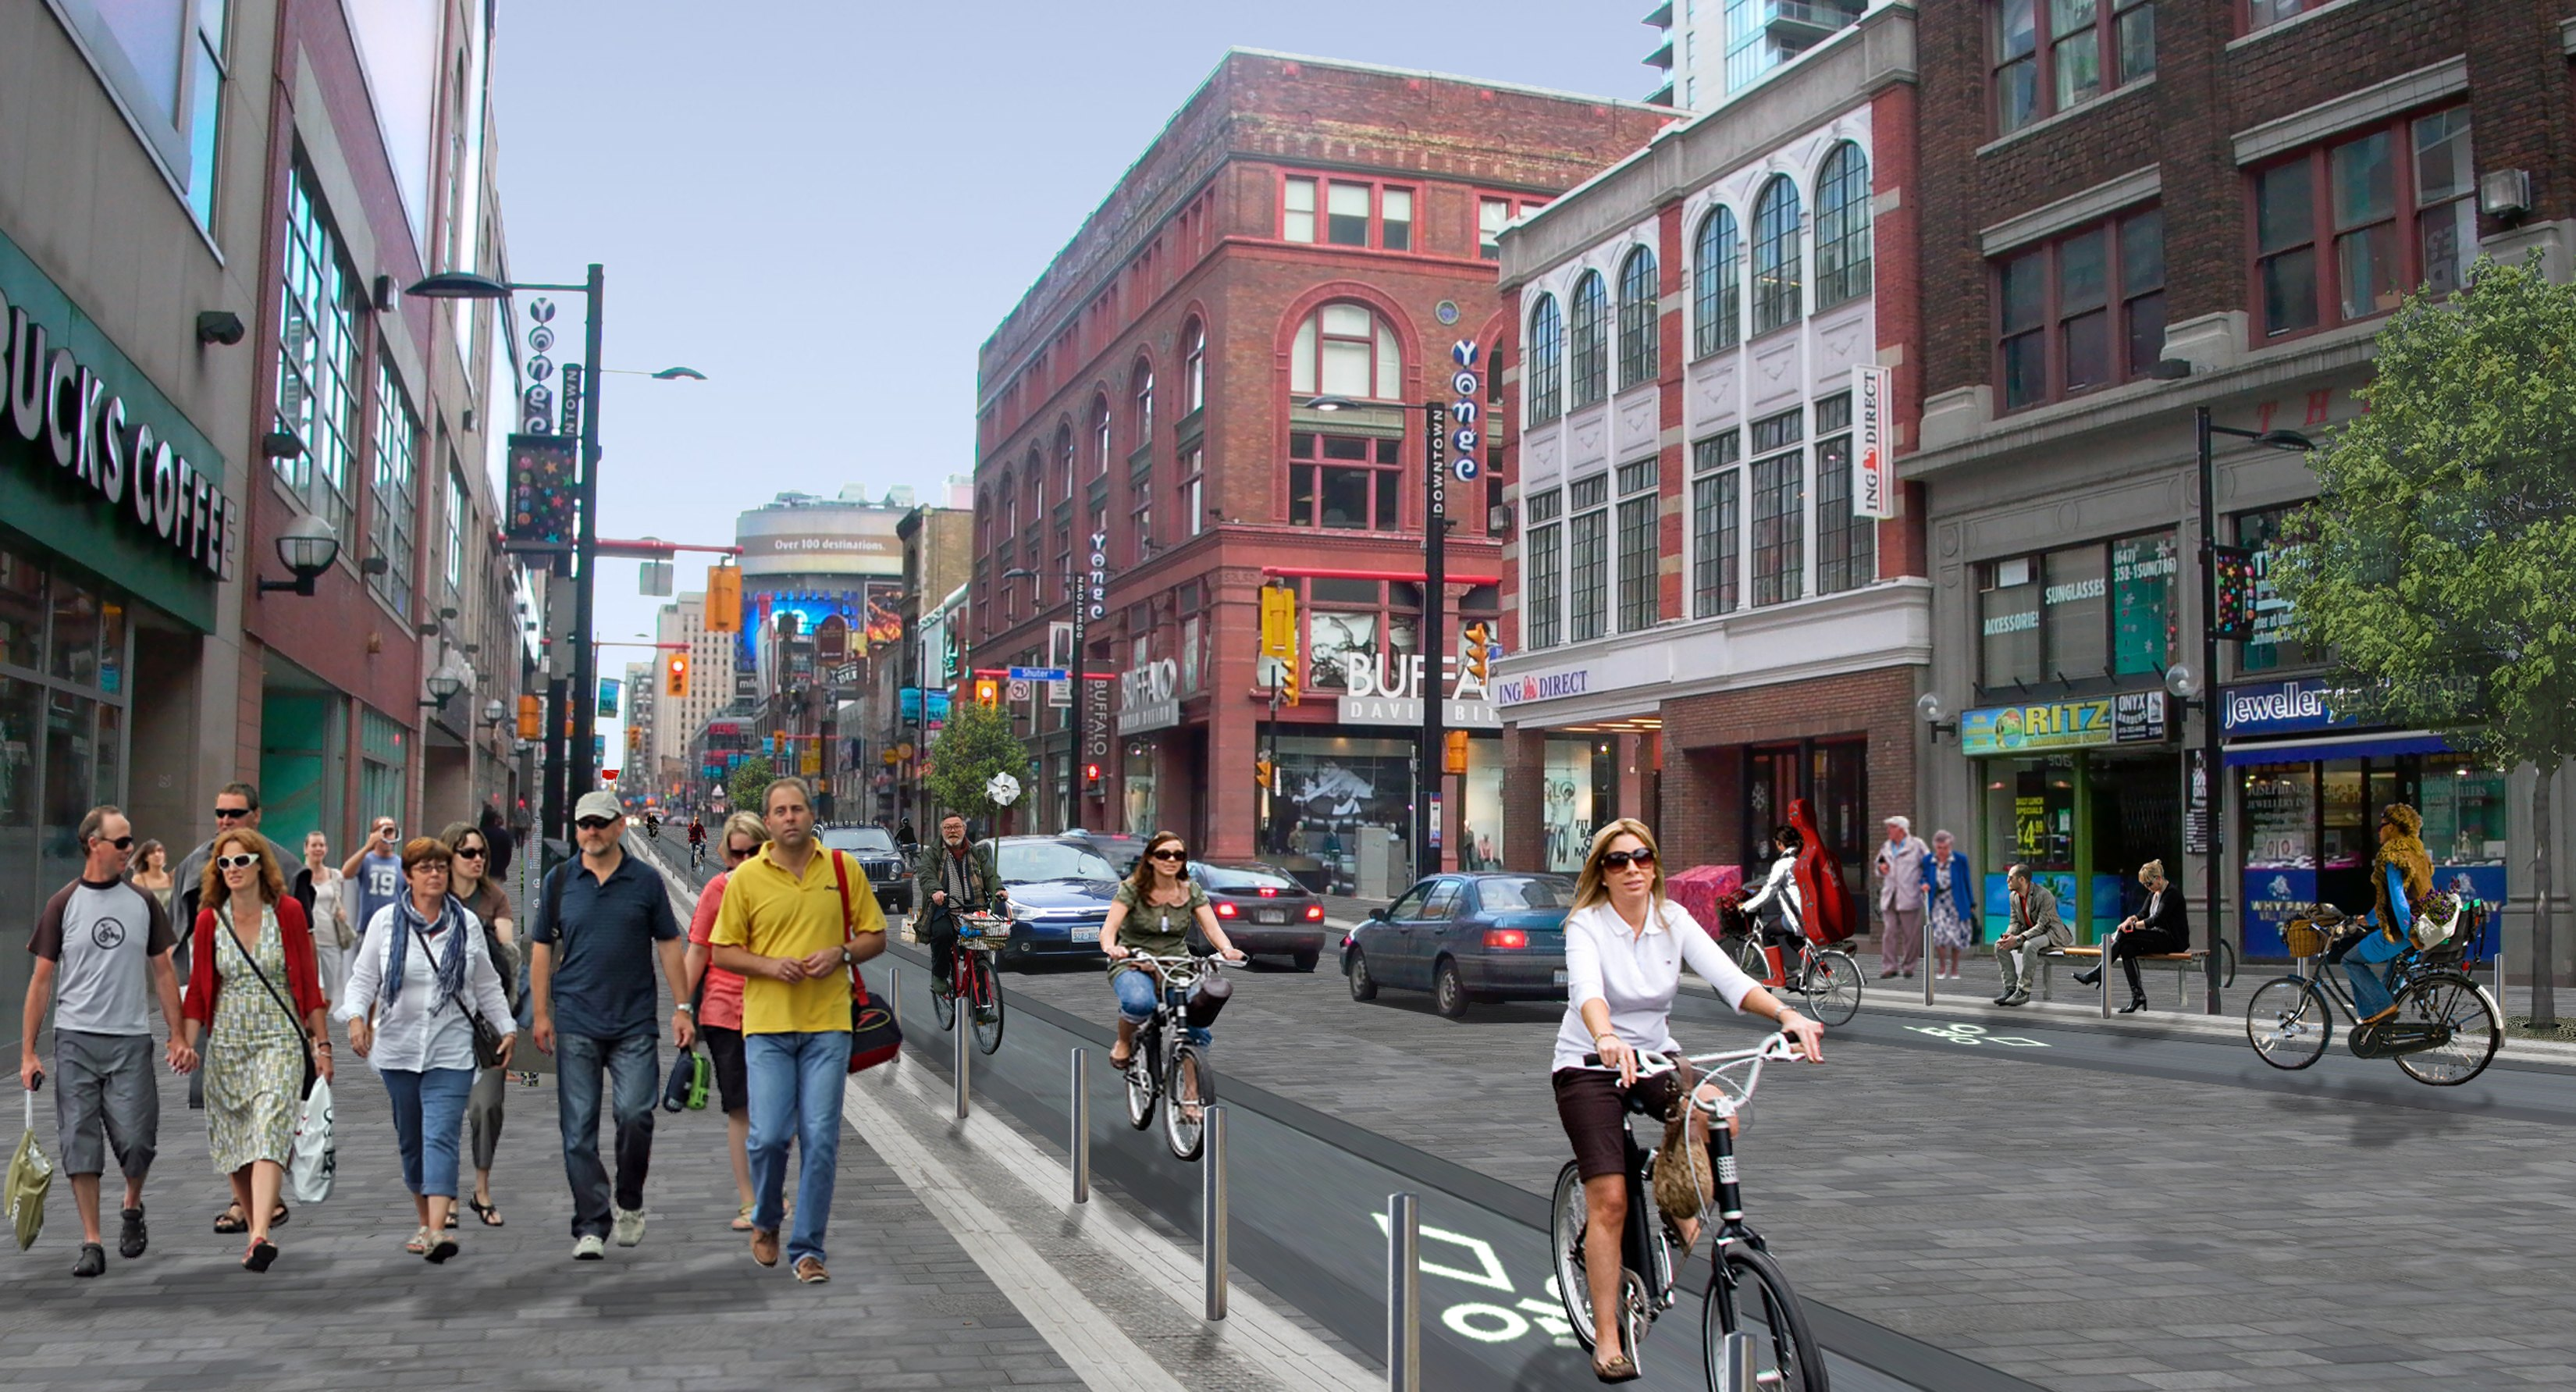

data/scream.jpg  text:  False  person:  False


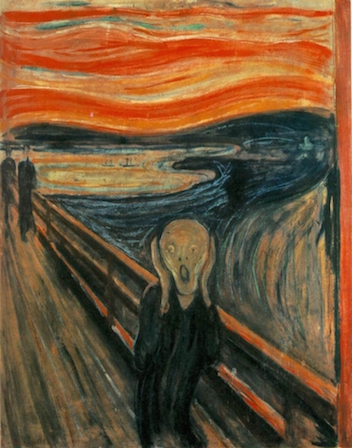

data/group.jpeg  text:  False  person:  True


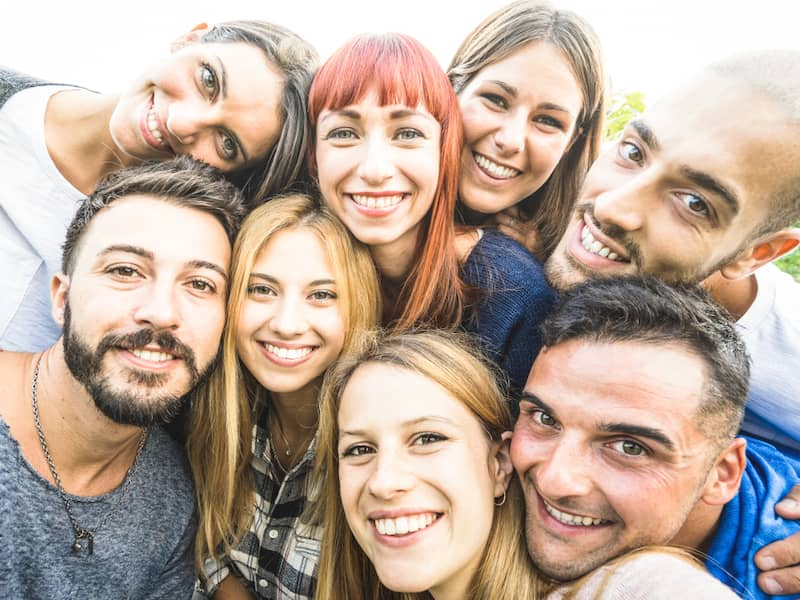

data/word.png  text:  True  person:  False


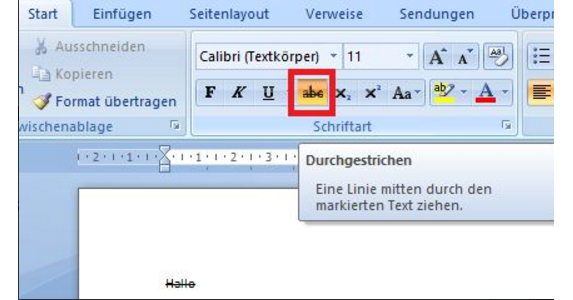

data/Cat.jpg  text:  False  person:  False


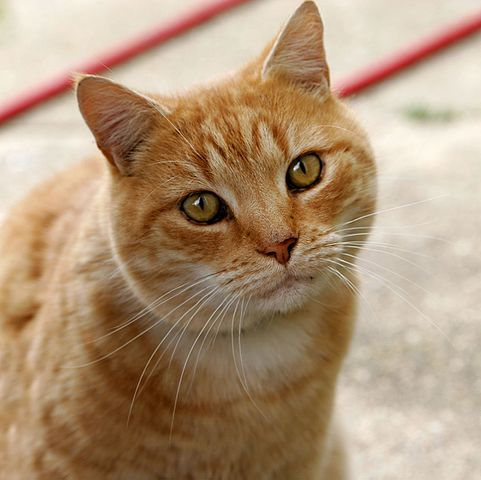

data/person.jpg  text:  False  person:  True


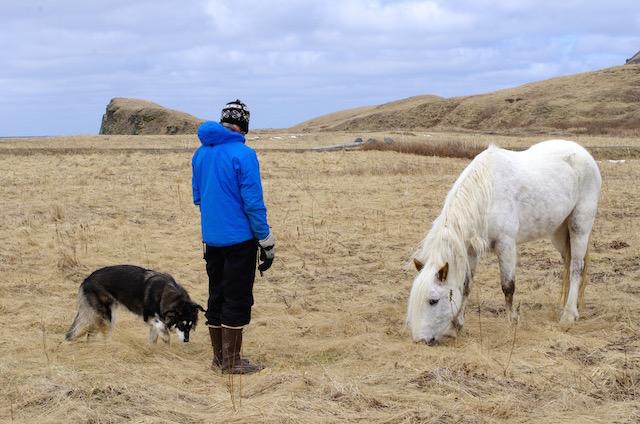

data/cover.jpeg  text:  True  person:  True


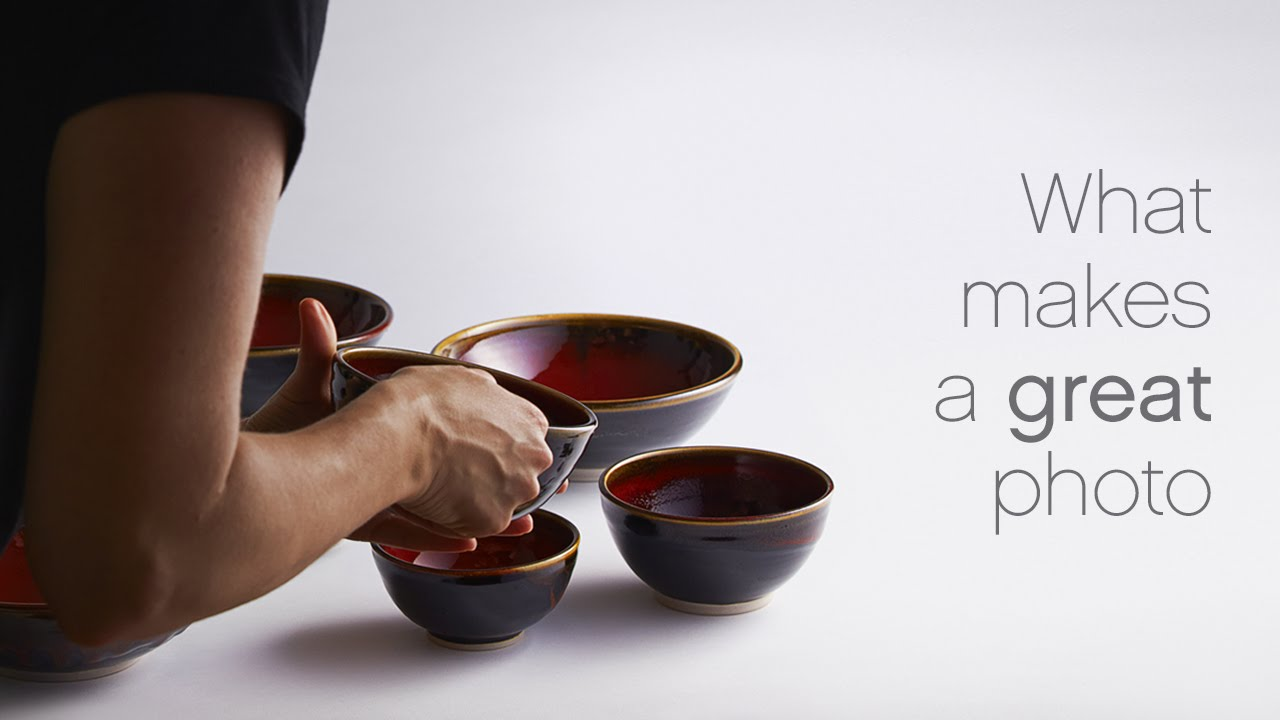

In [7]:
for i in filepaths:
    print(i, " text: ", text_found[i], " person: ", person_found[i])
    display(Image(filename=i))

# detect objects in images

In [8]:
def findObjects(filepath):
    INPUT_FILE=filepath
    LABELS_FILE='model/coco.names'
    CONFIG_FILE='model/yolov3.cfg'
    WEIGHTS_FILE='model/yolov3.weights'
    CONFIDENCE_THRESHOLD=0.3

    LABELS = open(LABELS_FILE).read().strip().split("\n")

    np.random.seed(4)
    COLORS = np.random.randint(0, 255, size=(len(LABELS), 3),
        dtype="uint8")


    net = cv2.dnn.readNetFromDarknet(CONFIG_FILE, WEIGHTS_FILE)

    image = cv2.imread(INPUT_FILE)
    (H, W) = image.shape[:2]

    # determine only the *output* layer names that we need from YOLO
    ln = net.getLayerNames()
    ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()] # if error, try i[0]-1


    blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416),
        swapRB=True, crop=False)
    net.setInput(blob)
    start = time.time()
    layerOutputs = net.forward(ln)
    end = time.time()


    print("[INFO] YOLO took {:.6f} seconds".format(end - start))


    # initialize our lists of detected bounding boxes, confidences, and
    # class IDs, respectively
    boxes = []
    confidences = []
    classIDs = []

    # loop over each of the layer outputs
    for output in layerOutputs:
        # loop over each of the detections
        for detection in output:
            # extract the class ID and confidence (i.e., probability) of
            # the current object detection
            scores = detection[5:]
            classID = np.argmax(scores)
            confidence = scores[classID]

            # filter out weak predictions by ensuring the detected
            # probability is greater than the minimum probability
            if confidence > CONFIDENCE_THRESHOLD:
                # scale the bounding box coordinates back relative to the
                # size of the image, keeping in mind that YOLO actually
                # returns the center (x, y)-coordinates of the bounding
                # box followed by the boxes' width and height
                box = detection[0:4] * np.array([W, H, W, H])
                (centerX, centerY, width, height) = box.astype("int")

                # use the center (x, y)-coordinates to derive the top and
                # and left corner of the bounding box
                x = int(centerX - (width / 2))
                y = int(centerY - (height / 2))

                # update our list of bounding box coordinates, confidences,
                # and class IDs
                boxes.append([x, y, int(width), int(height)])
                confidences.append(float(confidence))
                classIDs.append(classID)
                

    # apply non-maxima suppression to suppress weak, overlapping bounding
    # boxes
    idxs = cv2.dnn.NMSBoxes(boxes, confidences, CONFIDENCE_THRESHOLD, CONFIDENCE_THRESHOLD)
    
    # code to show boxes and pictures
    
    # ensure at least one detection exists
    if len(idxs) > 0:
        # loop over the indexes we are keeping
        for i in idxs.flatten():
            # extract the bounding box coordinates
            (x, y) = (boxes[i][0], boxes[i][1])
            (w, h) = (boxes[i][2], boxes[i][3])

            color = [int(c) for c in COLORS[classIDs[i]]]

            cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
            text = "{}: {:.4f}".format(LABELS[classIDs[i]], confidences[i])
            cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,
                0.5, color, 2)

    # show the output image
    pil_image = im.fromarray(image)
    pil_image.show()

In [9]:
findObjects("data/cover.jpeg")

[INFO] YOLO took 0.501881 seconds


# face recognition

In [10]:
image = face_recognition.load_image_file("data/group.jpeg")

I found 8 face(s) in this photograph.


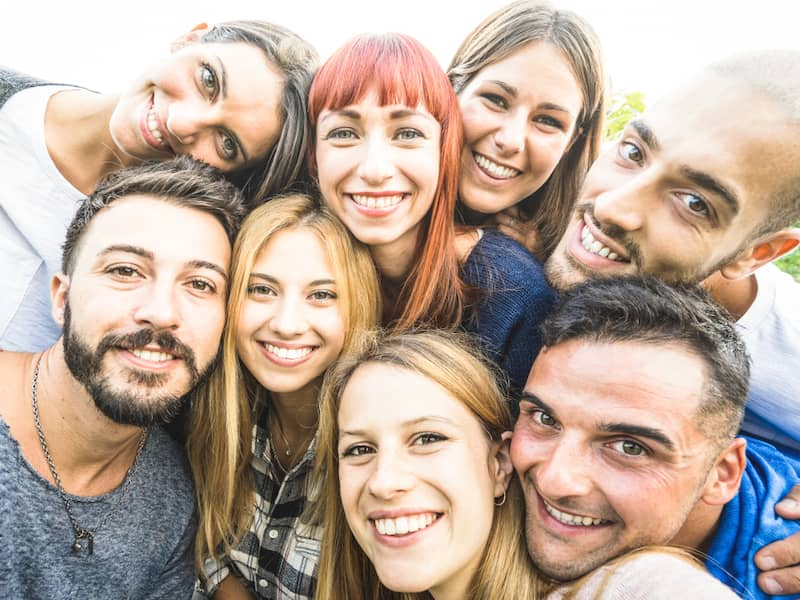

A face is located at pixel location Top: 378, Left: 324, Bottom: 542, Right: 488
A face is located at pixel location Top: 253, Left: 215, Bottom: 389, Right: 351
A face is located at pixel location Top: 59, Left: 436, Bottom: 195, Right: 572
A face is located at pixel location Top: 212, Left: 59, Bottom: 376, Right: 222
A face is located at pixel location Top: 354, Left: 489, Bottom: 551, Right: 685
A face is located at pixel location Top: 87, Left: 311, Bottom: 223, Right: 448
A face is located at pixel location Top: 129, Left: 556, Bottom: 293, Right: 720
A face is located at pixel location Top: 31, Left: 118, Bottom: 168, Right: 254


In [11]:
face_locations = face_recognition.face_locations(image, number_of_times_to_upsample=0, model="cnn")

print("I found {} face(s) in this photograph.".format(len(face_locations)))

display(Image(filename="data/group.jpeg"))

for face_location in face_locations:
    
    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # You can access the actual face itself like this:
    face_image = image[top:bottom, left:right]
    pil_image = im.fromarray(face_image)
    pil_image.show()